<a href="https://colab.research.google.com/github/SADHVIK1452/nlp/blob/main/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data fromkeras.datasets and perform following computational analysis:- [CO3]

(a) Preprocessing of the Data

(b) Divide data into training and testing data set

(c) Build the Gated Recurrent Units (GRU) Model

(d) Training the GRU Model

(e) Text Generation Using the Trained Model

(f) Evaluate Model’s accuracy

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import imdb

# (a) Preprocessing of the Data
vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# (c) Build the Gated Recurrent Units (GRU) Model
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GRU(128, return_sequences=False))  # Can use return_sequences=True for text generation
model.add(Dense(1, activation='sigmoid'))

# (d) Training the GRU Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, epochs=5, batch_size=128,
                    validation_split=0.2, callbacks=[early_stopping])

# (f) Evaluate Model’s accuracy
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# (e) Text Generation Using the Trained Model - Example (simple, placeholder)
# Not a fully trained language model but a simple way to generate sequences
def generate_text(seed_text, next_words=10):
    for _ in range(next_words):
        # Convert seed text into integers
        tokenized_input = pad_sequences([seed_text], maxlen=maxlen, truncating='pre')
        # Predict the next word
        predicted = model.predict(tokenized_input)
        # Assuming binary sentiment (0 or 1), just output sentiment as a placeholder
        print(f'Predicted sentiment score for next word: {predicted[0][0]}')

# Example seed input (using the first training example)
generate_text(x_train[0], next_words=5)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 873ms/step - accuracy: 0.6373 - loss: 0.6394 - val_accuracy: 0.8402 - val_loss: 0.3823
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 134s 857ms/step - accuracy: 0.8714 - loss: 0.3017 - val_accuracy: 0.8718 - val_loss: 0.3141
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 144s 870ms/step - accuracy: 0.9263 - loss: 0.1931 - val_accuracy: 0.8580 - val_loss: 0.3292
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 858ms/step - accuracy: 0.9491 - loss: 0.1471 - val_accuracy: 0.8554 - val_loss: 0.3502
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 139s 837ms/step - accuracy: 0.9627 - loss: 0.1056 - val_accuracy: 0.8522 - val_loss: 0.3899
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.8486 - loss: 0.4118
Test Loss: 0.40551745891571045
Test Accuracy: 0.8483999967575073
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
Predicted sentiment score for next word: 0.9971373081207275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted senti

Compare accuracy of Long sort term memory and Gated recurrent Unit models for text generation using data from tensorflow.keras.datasets. [CO3]

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 68s 415ms/step - accuracy: 0.6825 - loss: 0.5613 - val_accuracy: 0.8446 - val_loss: 0.3614
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 403ms/step - accuracy: 0.8966 - loss: 0.2640 - val_accuracy: 0.8482 - val_loss: 0.3499
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 409ms/step - accuracy: 0.9330 - loss: 0.1918 - val_accuracy: 0.8430 - val_loss: 0.3727
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 405ms/step - accuracy: 0.9563 - loss: 0.1268 - val_accuracy: 0.8318 - val_loss: 0.5235
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 63s 400ms/step - accuracy: 0.9652 - loss: 0.1007 - val_accuracy: 0.8334 - val_loss: 0.5643
LSTM Model Accuracy: 0.8288
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 72s 442ms/step - accuracy: 0.6401 - loss: 0.6111 - val_accuracy: 0.8332 - val_loss: 0.3678
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 66s 421ms/step - accuracy: 0.8813 - loss: 0.2859 - val_accuracy: 0.8438 - val_loss: 0.3547
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 421ms/step - accuracy: 0.9238

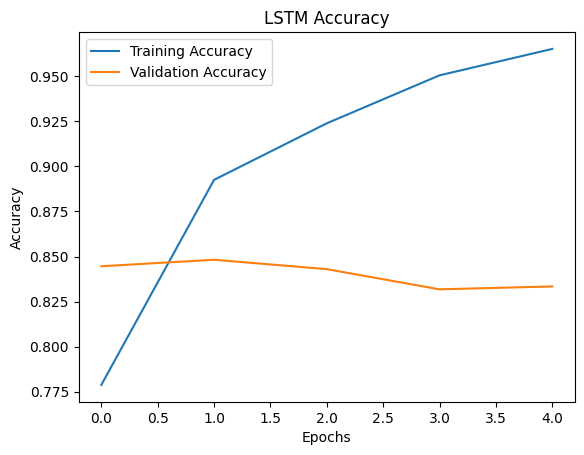

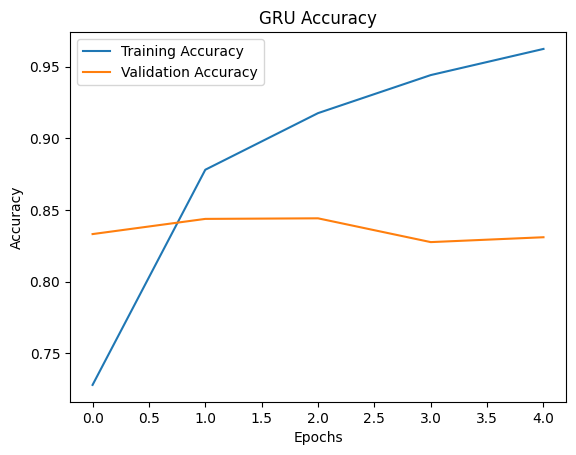

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Parameters
max_words = 10000  # Maximum number of words to consider as features
maxlen = 100       # Cut texts after this number of words (among top max_words most common words)

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Function to create an LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=maxlen))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to create a GRU model
def create_gru_model():
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=maxlen))
    model.add(GRU(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train the LSTM model
lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test, verbose=0)
print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')

# Train the GRU model
gru_model = create_gru_model()
gru_history = gru_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the GRU model
gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test, verbose=0)
print(f'GRU Model Accuracy: {gru_accuracy:.4f}')

# Function to plot training history
def plot_history(history, model_name):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot training history for both models
plot_history(lstm_history, 'LSTM')
plot_history(gru_history, 'GRU')
